In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To import Q-Q plot function
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('../8.1 DATA/concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# There are some 0 value but no negative values.
# Although Box-Cox requires strictly positive values, but we will do something to apply both transform .

In [12]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("R2 score without any transformation: ", r2_score(y_test, y_pred))

R2 score without any transformation:  0.6275531792314852


In [15]:
# Cross checking with cross validation
lr = LinearRegression()
np.mean(cross_val_score(lr, x, y, cv=5, scoring='r2'))

0.4609940491662866

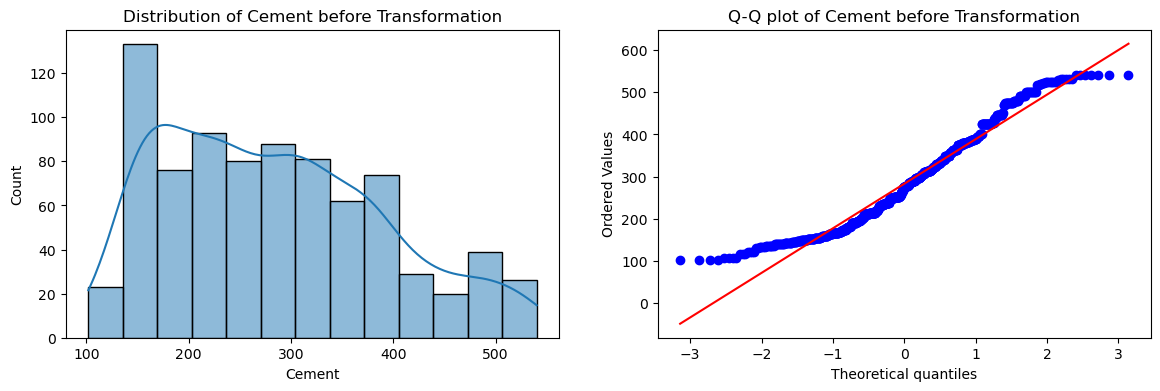

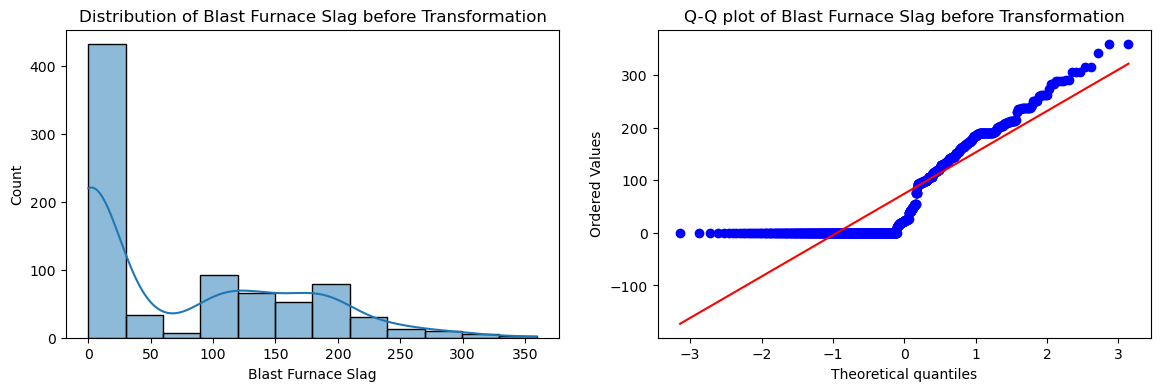

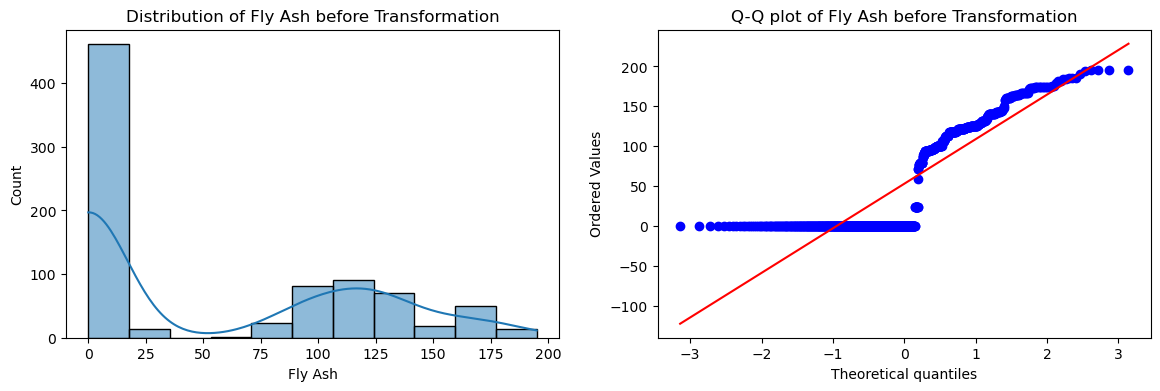

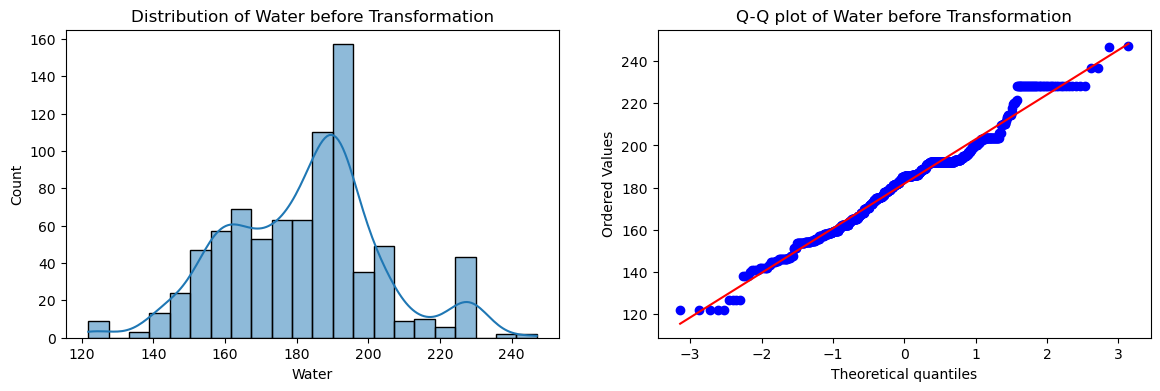

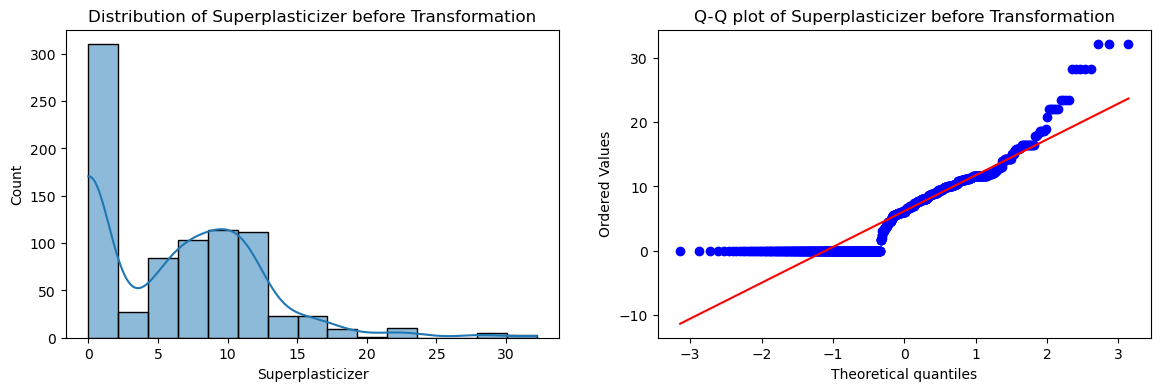

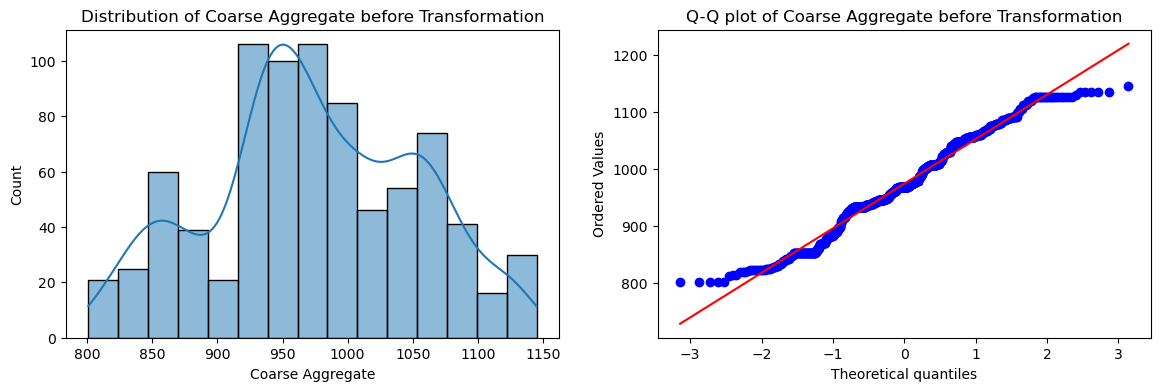

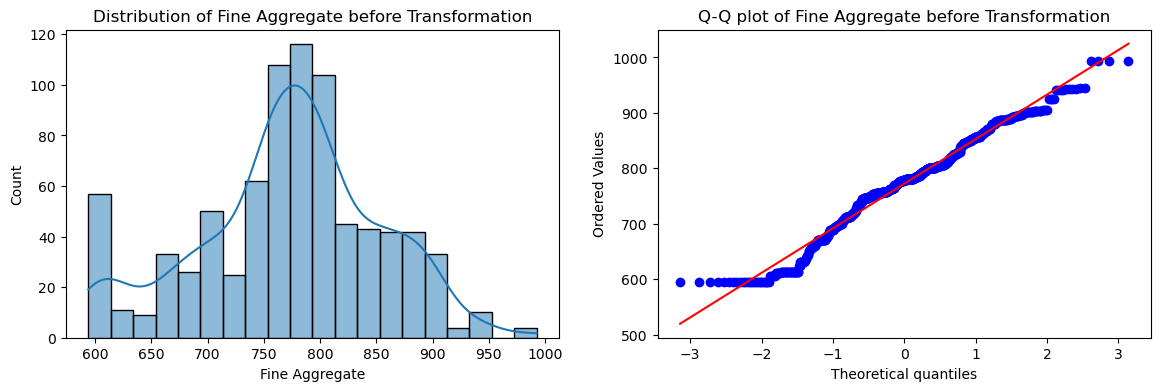

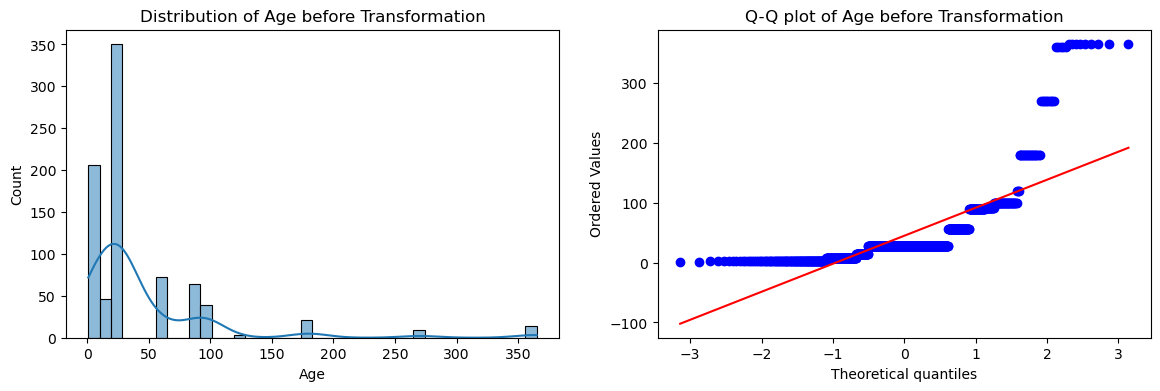

In [17]:
# Plotting the distplot without any transformation

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Distribution of {col} before Transformation')
    
    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col} before Transformation')
    
    plt.show()

In [18]:
# Applying Box-Cox Transformation

pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train + 0.00001)  # Adding a small constant to avoid zero values
x_test_transformed = pt.fit_transform(x_test + 0.00001)  # Adding a small constant to avoid zero values

In [19]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambda':pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.028899
2,Fly Ash,-0.007561
3,Water,0.959062
4,Superplasticizer,0.119398
5,Coarse Aggregate,1.192491
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [20]:
df.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
421,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,14,34.24


In [21]:
# So the transformation is any value in the column raised to the power of the corresponding lambda value.
# For example, for Cement column->value 178.0, the lambda value is 0.215602, so the transformation is 178.0^0.215602

In [24]:
# Applying Regression after Box-Cox transformation
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
y_pred = lr.predict(x_test_transformed)
print("R2 score without any transformation: ", r2_score(y_test, y_pred))

R2 score without any transformation:  0.8061415969341612


In [25]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x + 0.00001) 

lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed, y, cv=5, scoring='r2'))

0.6668489643736011

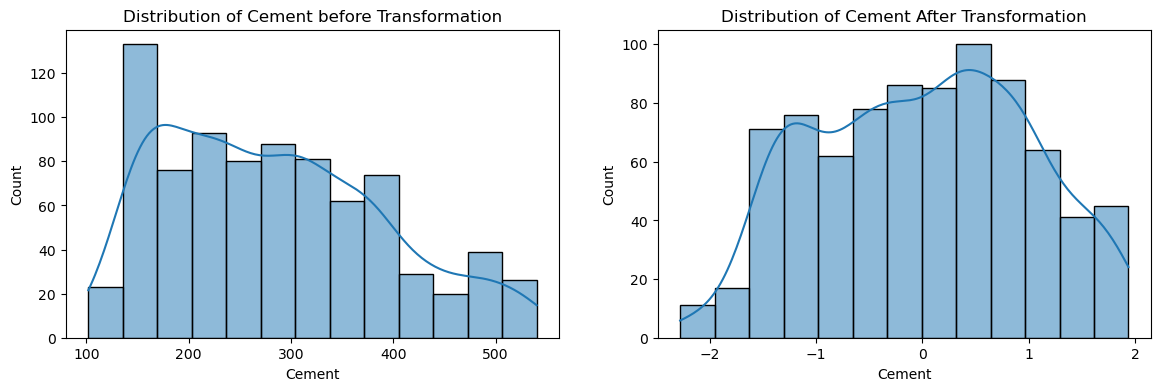

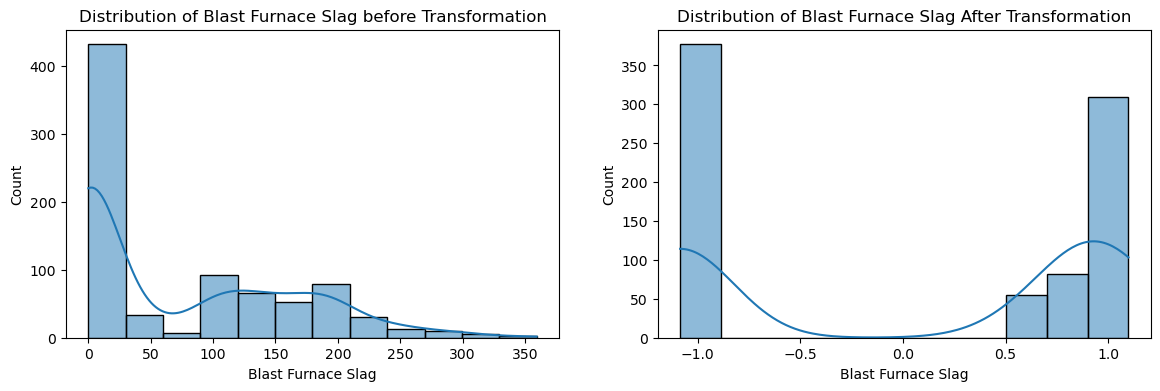

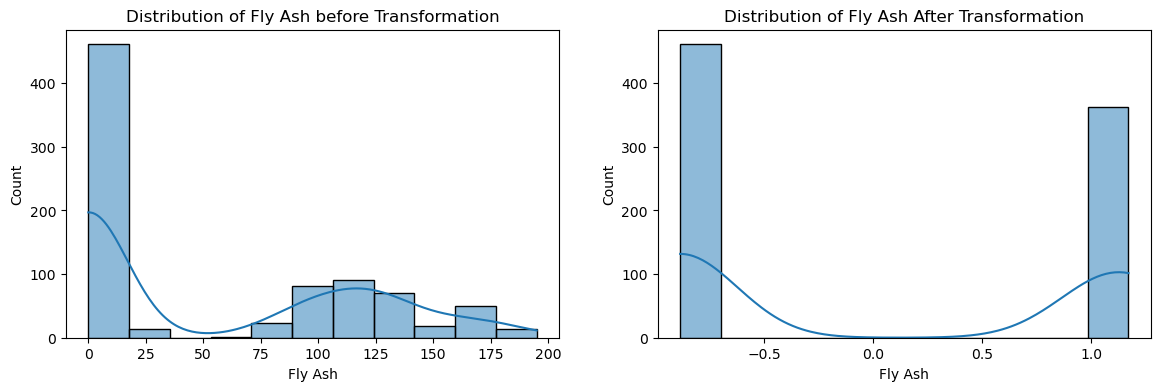

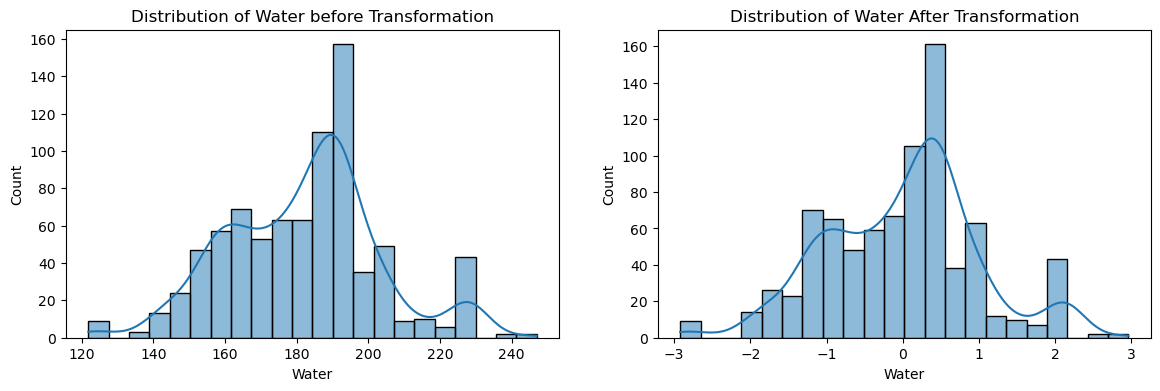

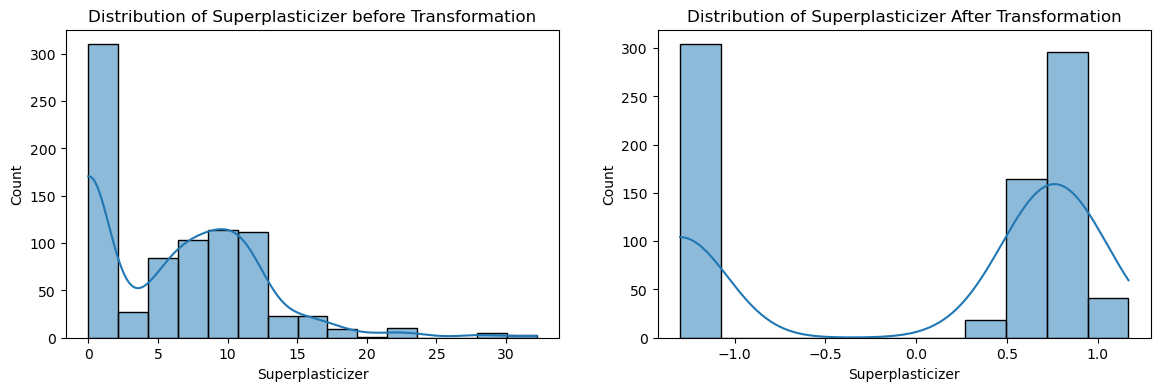

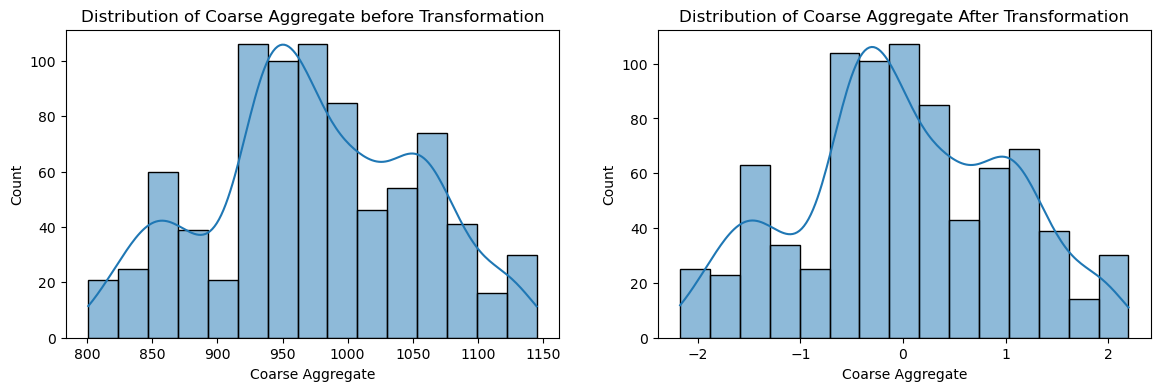

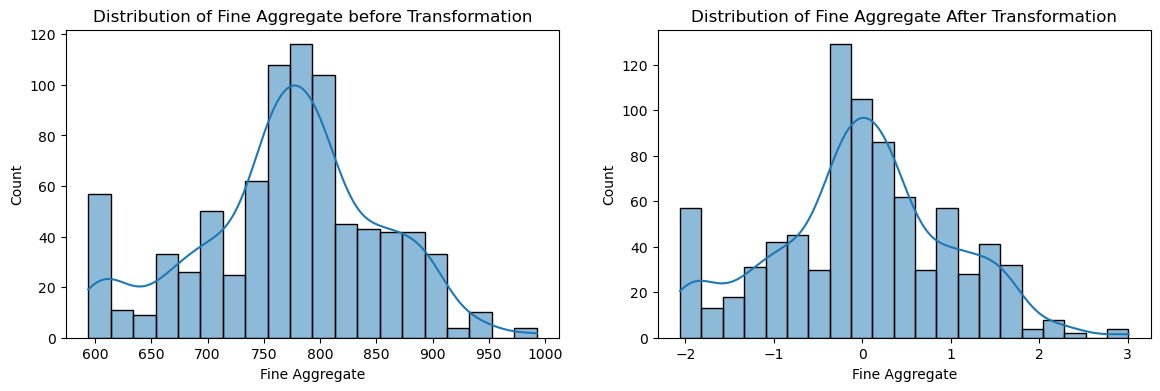

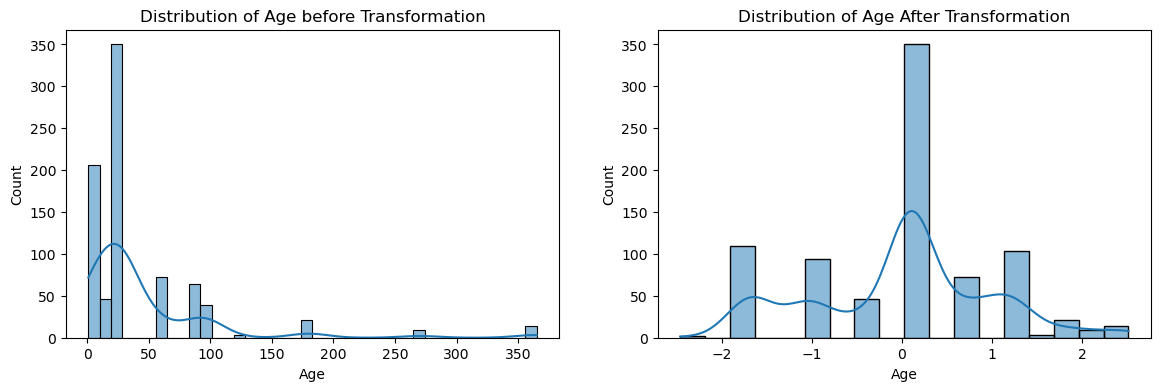

In [28]:
# Before and After comparison for Box-Cox Transformation

x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Distribution of {col} before Transformation')
    
    plt.subplot(122)
    sns.histplot(x_train_transformed[col], kde=True)
    plt.title(f'Distribution of {col} After Transformation')

    plt.show()

In [29]:
# Apply Yeo-Johnson Transformation

pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)
y_pred = lr.predict(x_test_transformed2)
print("R2 score without any transformation: ", r2_score(y_test, y_pred))

pd.DataFrame({'cols':x_train.columns,'yeo_johnson_lambda':pt1.lambdas_})

R2 score without any transformation:  0.8153845514638944


,cols,yeo_johnson_lambda
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [30]:
# using cross val score
pt1 = PowerTransformer()
x_transformed2 = pt1.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed2, y, cv=5, scoring='r2'))

0.6834625141500867

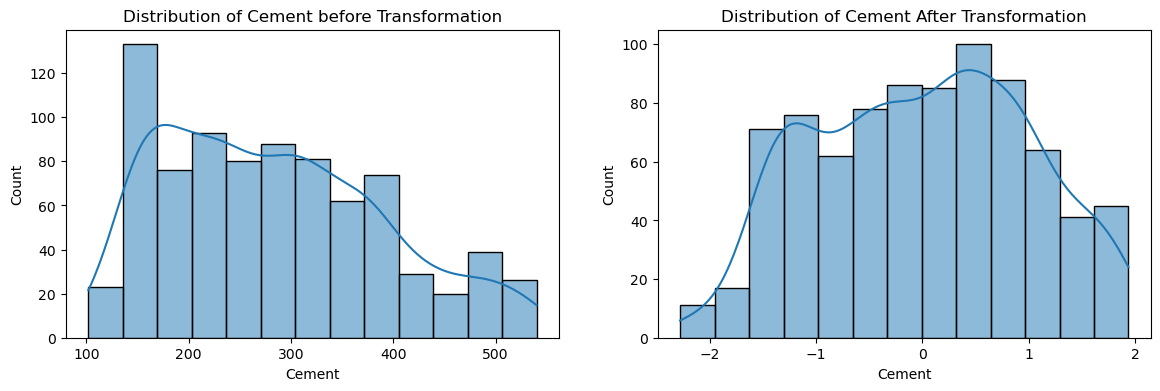

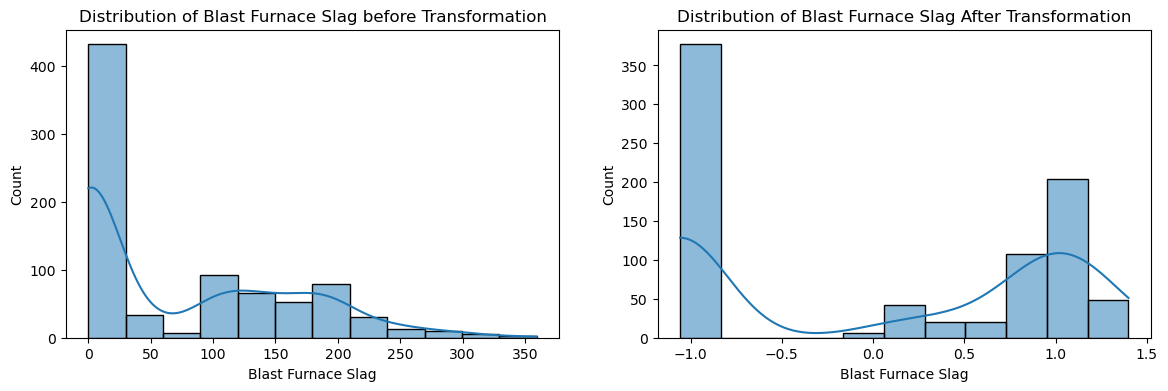

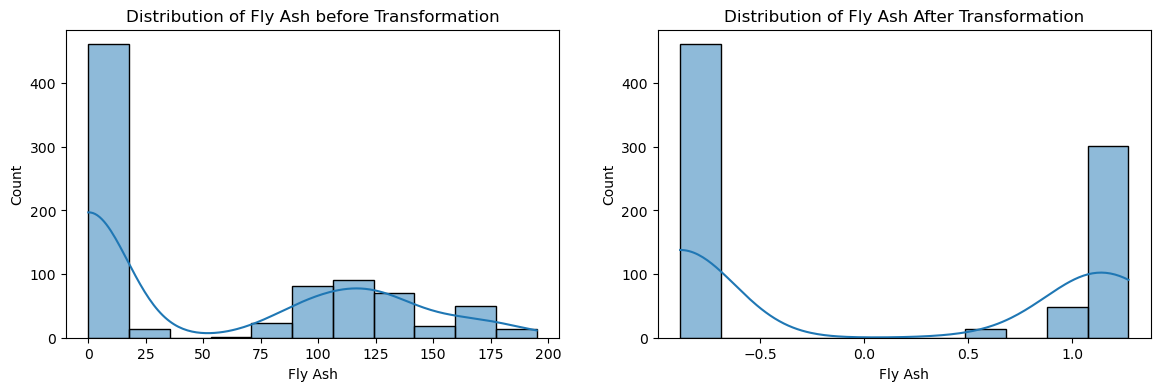

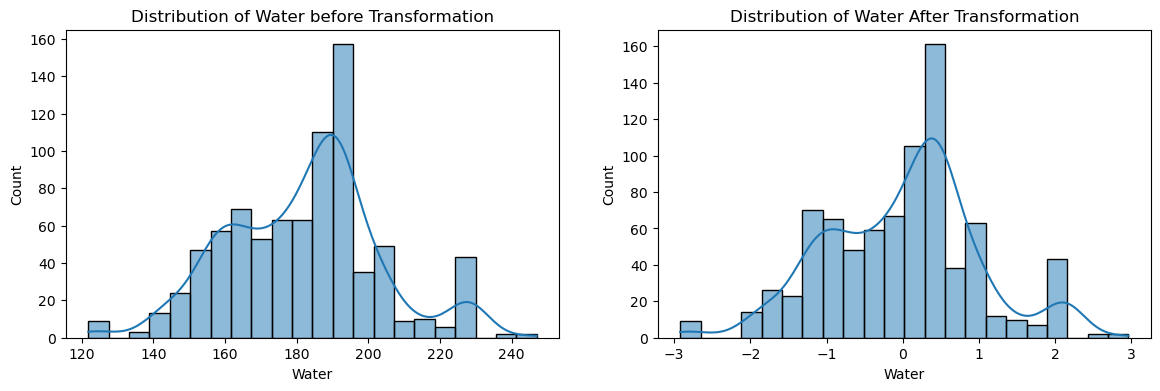

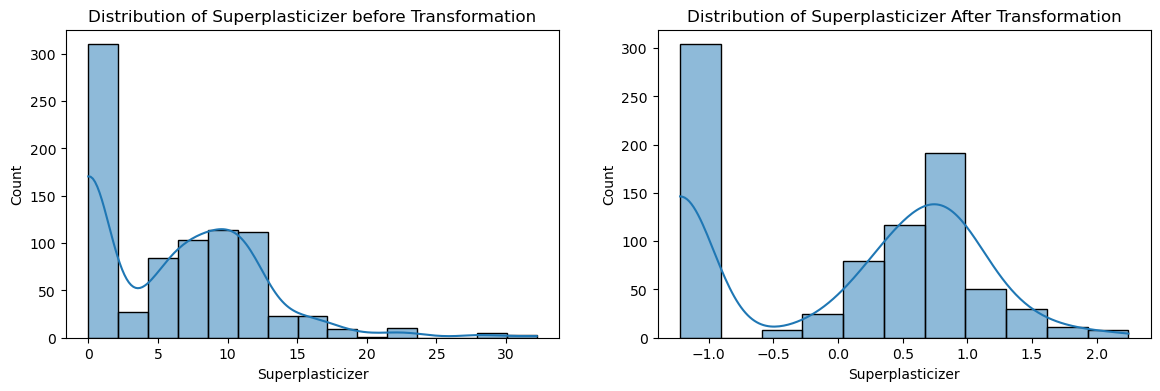

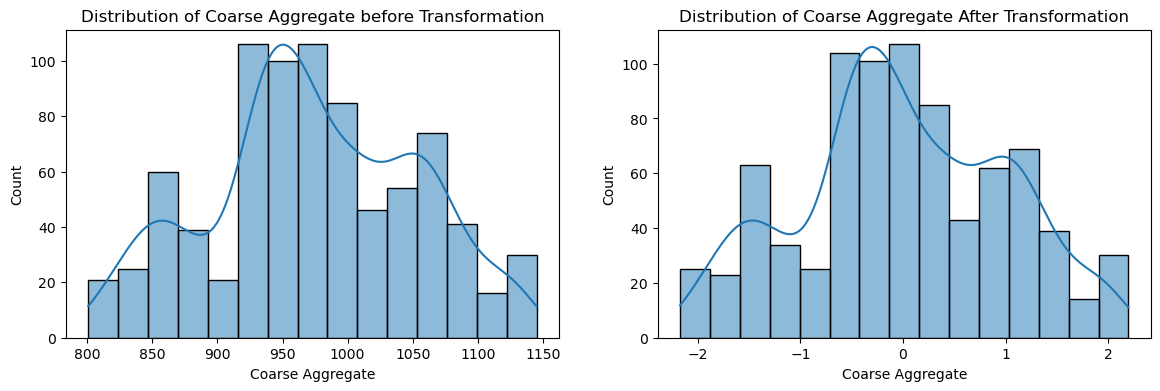

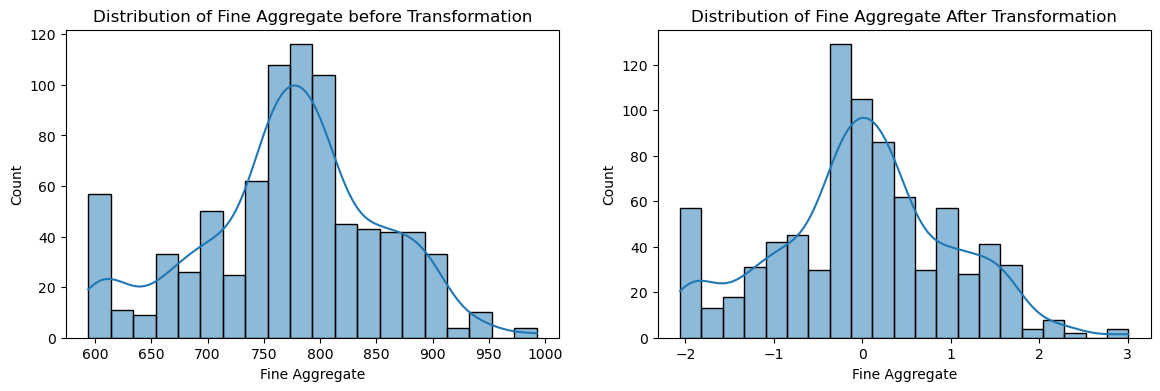

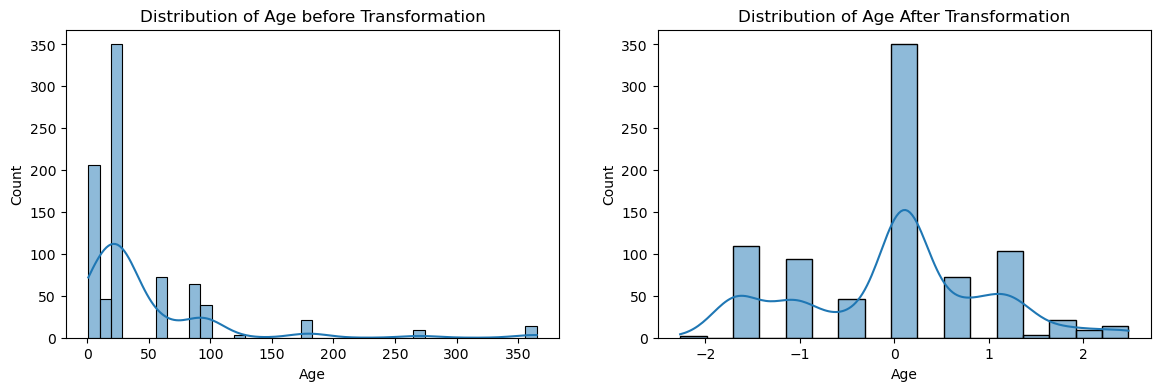

In [ ]:
# Before and After comparison for Yeo-Johnson Transformation

x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Distribution of {col} before Transformation')
    
    plt.subplot(122)
    sns.histplot(x_train_transformed2[col], kde=True)
    plt.title(f'Distribution of {col} After Transformation')

    plt.show()

In [32]:
# Sid by side comparison of Box-Cox and Yeo-Johnson Transformation
pd.DataFrame({'cols':x_train.columns,'Box-cox lambdas':pt.lambdas_,'Yeo-Johnson lambdas':pt1.lambdas_})

,cols,Box-cox lambdas,Yeo-Johnson lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.028052,0.016633
2,Fly Ash,-0.037072,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.114979,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
